# **Decision Trees**

# **2.1** ***Animal Control/Shelter Data:***

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline 

In [9]:
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# **Load Data**


***Preview Shelter Data***

In [10]:
# Load Data
shelter_data = pd.read_csv("/content/shelter_data.csv")

In [11]:
# Preview Data
shelter_data.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A671945,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [12]:
# Preview  Feature
shelter_data['DateTime'].value_counts()

2015-08-11 00:00:00    19
2015-11-17 00:00:00    17
2015-07-02 00:00:00    13
2015-04-02 00:00:00    11
2014-08-31 09:00:00    10
                       ..
2014-08-08 12:26:00     1
2014-03-28 15:04:00     1
2015-01-12 15:52:00     1
2015-02-24 16:30:00     1
2014-04-27 12:22:00     1
Name: DateTime, Length: 22918, dtype: int64

In [13]:
# Preview Unique Values in Feature
shelter_data['OutcomeType'].unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'],
      dtype=object)

In [14]:
# Preview Unique Values in Feature
shelter_data['OutcomeSubtype'].unique()

array([nan, 'Suffering', 'Foster', 'Partner', 'Offsite', 'SCRP',
       'Aggressive', 'Behavior', 'Rabies Risk', 'Medical', 'In Kennel',
       'In Foster', 'Barn', 'Court/Investigation', 'Enroute', 'At Vet',
       'In Surgery'], dtype=object)

In [15]:
# Preview Unique Values in Feature
shelter_data['AnimalType'].unique()

array(['Dog', 'Cat'], dtype=object)

In [16]:
# Preview Unique Values in Feature
shelter_data['SexuponOutcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

In [17]:
# Preview Unique Values in Feature
shelter_data['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       nan, '17 years', '18 years', '19 years', '20 years'], dtype=object)

In [18]:
# Preview Unique Values in Feature
shelter_data['Breed'].unique()

array(['Shetland Sheepdog Mix', 'Domestic Shorthair Mix', 'Pit Bull Mix',
       ..., 'Vizsla/Boxer', 'German Shepherd/Australian Kelpie',
       'Boxer/German Shepherd'], dtype=object)

In [19]:
# Preview Feature
shelter_data['Color'].value_counts()

Black/White             2824
Black                   2292
Brown Tabby             1635
Brown Tabby/White        940
White                    931
                        ... 
Red Tick/Brown Merle       1
Yellow Brindle/Tan         1
Brown/Black Tabby          1
Black/Black Tabby          1
Sable/Buff                 1
Name: Color, Length: 366, dtype: int64

***PreProcess Data***

In [20]:
# Drop Missing Values
clean_df = shelter_data.dropna()

In [21]:
## Preprocess & Feature Selection

# Set Features
X = clean_df[['AnimalType', 'SexuponOutcome', 'AgeuponOutcome']]
Y = clean_df['OutcomeType']

# Ordinal Encode Categorical Variables & Transform
ord_enc = OrdinalEncoder()
x = pd.DataFrame(ord_enc.fit_transform(X), 
                 columns = list(X))

# Encode Target Label & Transform 
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(Y)

***Split Data into Test/Train sets***

In [22]:
# Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)

***Modeling***

In [23]:
# Default Decision Tree Classifier 
clf = tree.DecisionTreeClassifier() # Create Model
clf = clf.fit(x_train,y_train) # Fit on Training Data

# Prediction
y_pred = clf.predict(x_test)

# Accuracy 
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.73 


In [24]:
# Confusion Matrix - (inverse_transform to scale back the data to original representation)
cm_default = confusion_matrix(lab_enc.inverse_transform(y_test),  
                              lab_enc.inverse_transform(y_pred))
# CM Labels
labels = ['Adoption', 'Died', 'Euthanasia', 'Transfer']
# Store Results
test_results = pd.DataFrame(cm_default, index=labels, columns=labels)

# Display Results
display(test_results)


,Adoption,Died,Euthanasia,Transfer
Adoption,476,0,10,365
Died,3,0,1,31
Euthanasia,10,0,42,309
Transfer,164,0,40,2039


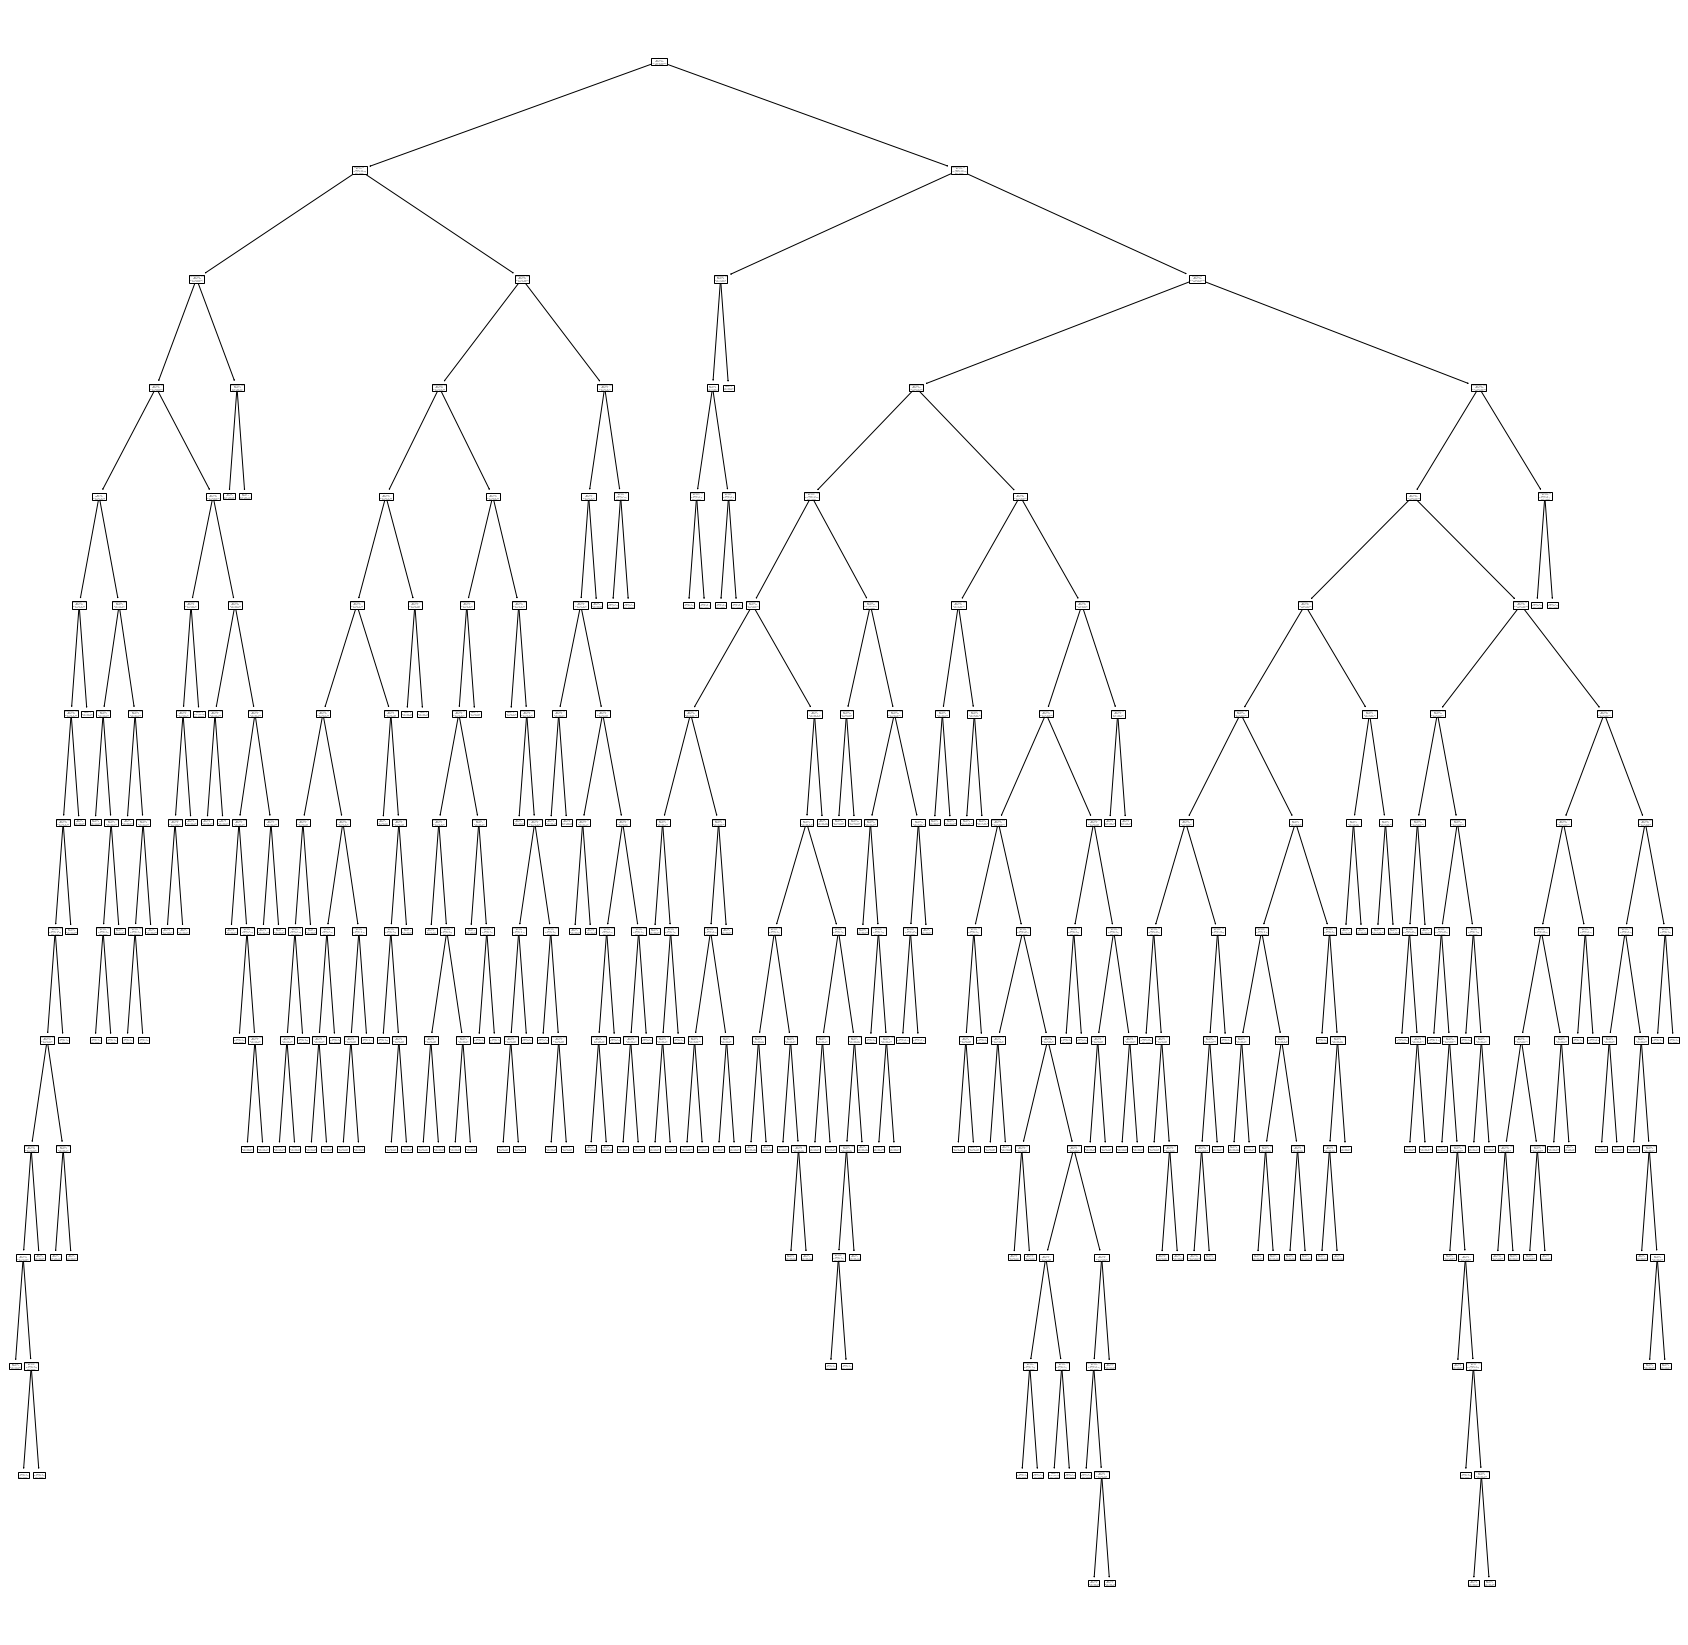

In [25]:
# Plot the decision tree
fig,ax = plt.subplots(figsize = (30,30))
treeplot = tree.plot_tree(clf, feature_names=['AnimalType','SexuponOutcome','AgeuponOutcome'],
class_names = ['Adoption', 'Died', 'Euthanasia', 'Transfer'],ax=ax)

## ***New Model***

Develop a classification model for the shelter_data.csv dataset

- Train a new decision tree using a max_depth of 3


In [26]:
# New Decision Tree Classifier (Short Tree)
short_tree = tree.DecisionTreeClassifier(max_depth=3) # Create Model
short_tree = short_tree.fit(x_train,y_train) # Fit on Training Data

# Prediction
y_pred_ST = short_tree.predict(x_test)


***Model Accuracy***

In [27]:
# Accuracy 
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred_ST))

accuracy 0.66 


***Confusion Matrix***

In [28]:
# Confusion Matrix - 
cm_shortTree = confusion_matrix(lab_enc.inverse_transform(y_test),  
                              lab_enc.inverse_transform(y_pred_ST))
# Store Results
test_results_shortTree = pd.DataFrame(cm_shortTree, index=labels, columns=labels)

# Display Results
display(test_results_shortTree)


,Adoption,Died,Euthanasia,Transfer
Adoption,65,0,0,786
Died,0,0,0,35
Euthanasia,0,0,1,360
Transfer,3,0,1,2239


***Decision Tree Plot***

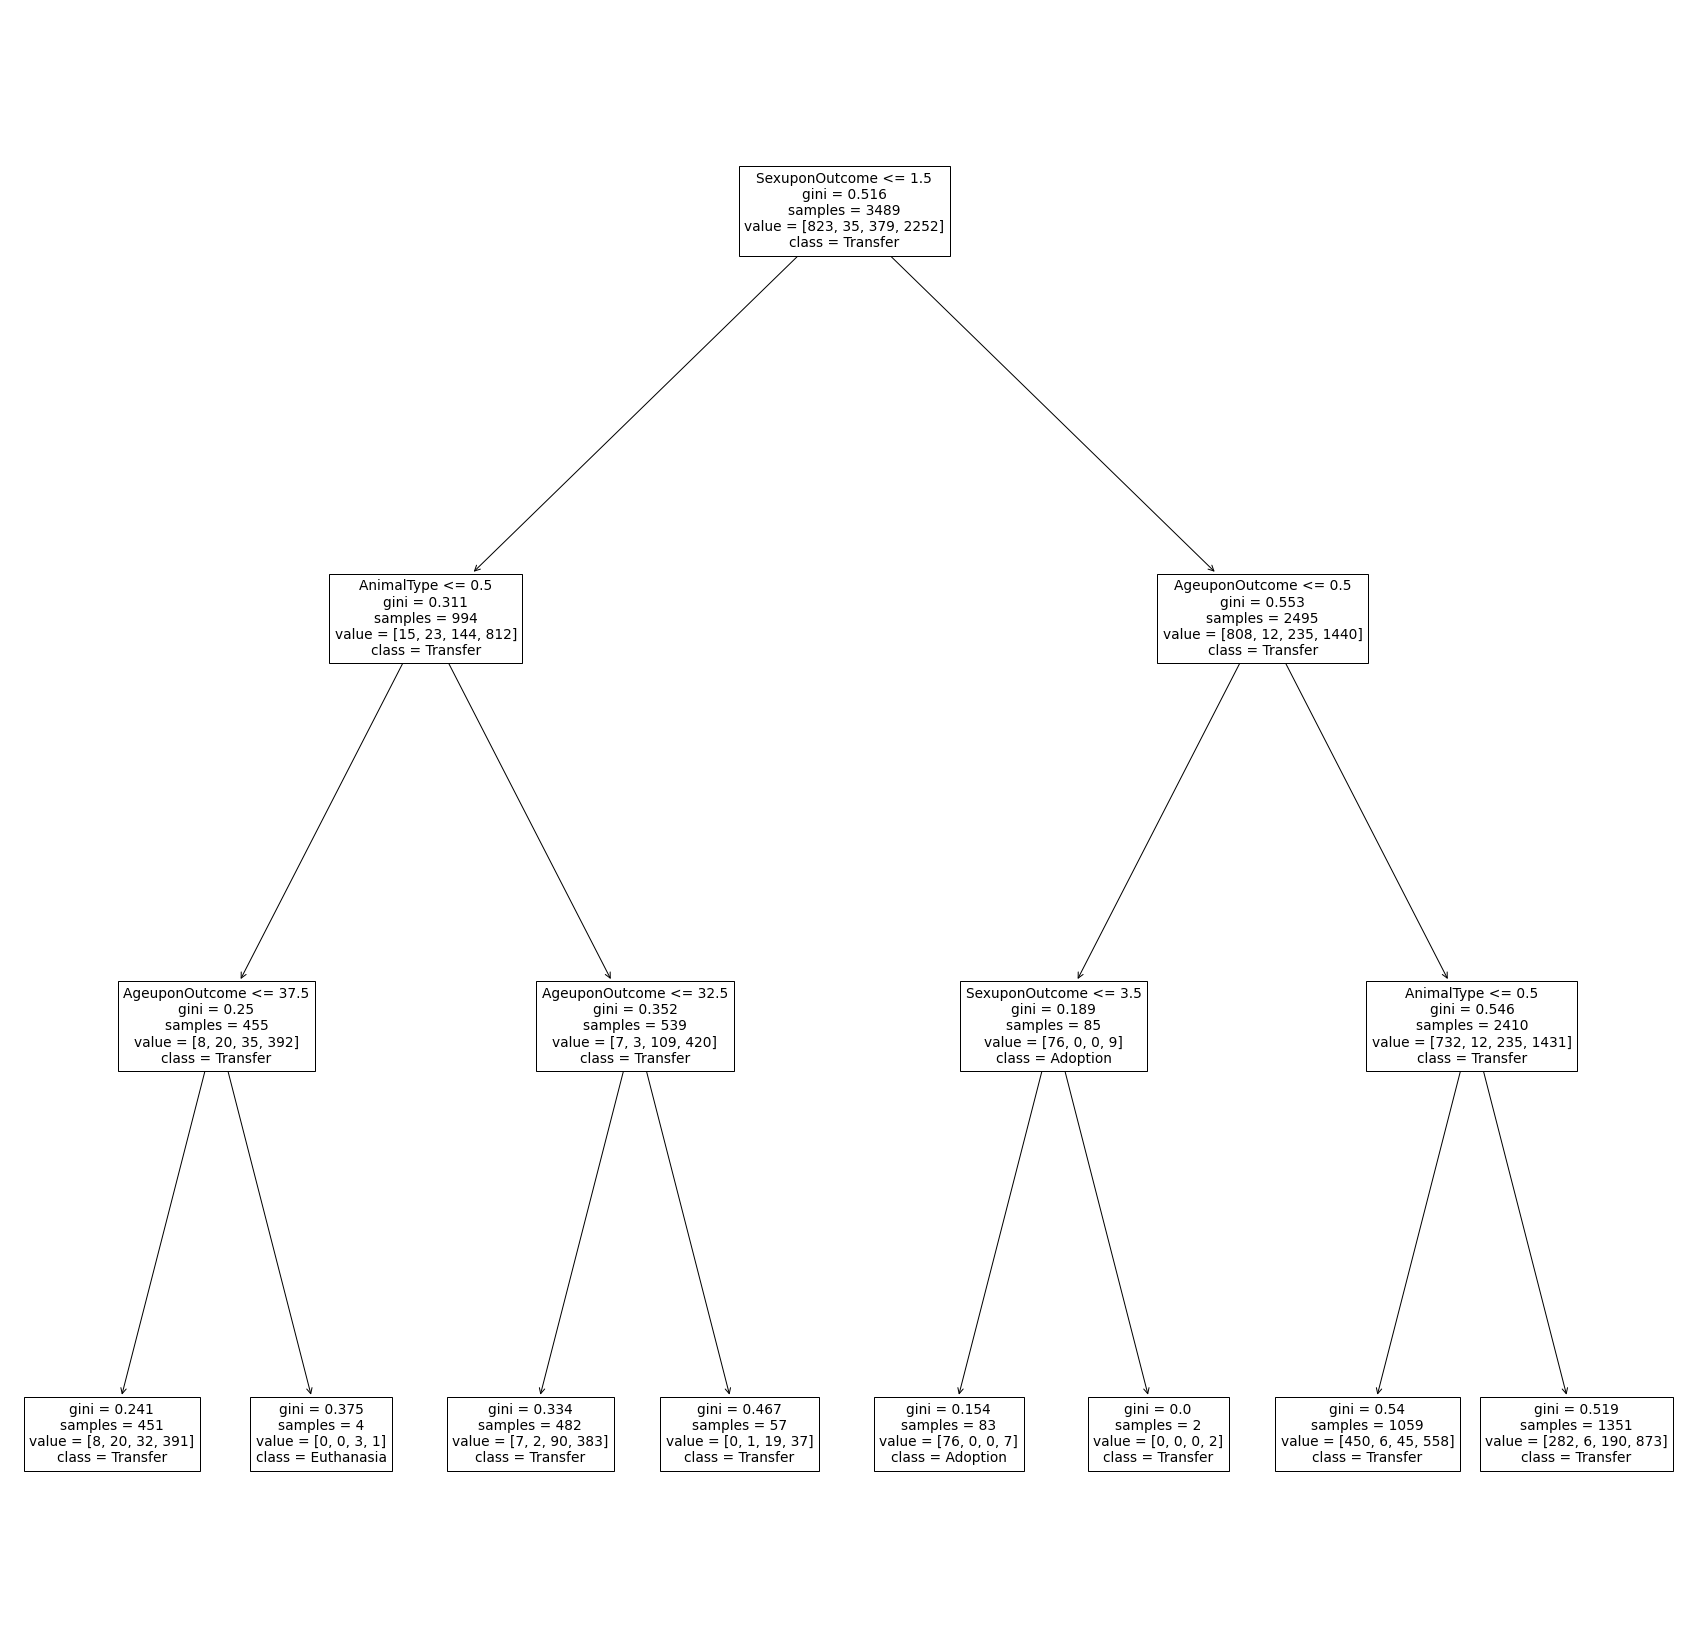

In [29]:
# Plot the decision tree
fig,ax = plt.subplots(figsize = (30,30))
treeplot = tree.plot_tree(short_tree, feature_names=['AnimalType','SexuponOutcome','AgeuponOutcome'],
class_names = ['Adoption', 'Died', 'Euthanasia', 'Transfer'],ax=ax)

# **Varying Tree Depth using Loop**



In [30]:
train_errors = list()
test_errors = list()

for x in range(3,11): # Tree depth is varied in a loop from 3 to 10
  
  #Create multiple models here each based on the x variable above
  short_tree_tuned = tree.DecisionTreeClassifier(max_depth=x)
  short_tree_tuned = short_tree_tuned.fit(x_train,y_train)

  # Store the result of modes in train_erors and test_errors variables
  train_errors.append(short_tree_tuned.score(x_train, y_train)) # Train Errors
  test_errors.append(short_tree_tuned.score(x_test, y_test))    # Test Errors
 

***Plot Performance of Test/Train with Varying Depth***




Text(0, 0.5, 'Performance')

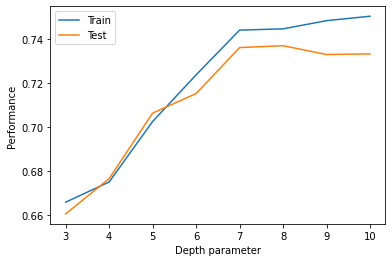

In [31]:
# Plot of test and training errors
plt.plot(range(3,11),train_errors, label='Train')
plt.plot(range(3,11),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')

For the training set, the performance keeps improving as the deph is increase with best performing depth parameter being 10. For the test set, the performance decreases after the optimal tree depth which is at 8. 

# **Tree Pruning**

***Pruned Tree***

In [32]:
tree_prune = tree.DecisionTreeClassifier(ccp_alpha = 0.0007) # Pruned Model
tree_prune = tree_prune.fit(x_train,y_train)
treeplot = tree.plot_tree(tree_prune, feature_names=['AnimalType','SexuponOutcome','AgeuponOutcome'],
class_names = ['Adoption', 'Died', 'Euthanasia', 'Transfer'],ax=ax)

# **Pruned VS Unpruned Decision Tree**

***Accuracy Comparison***

In [33]:
# Unpruned Decision Tree Model
clf = tree.DecisionTreeClassifier(max_depth = 7 ) 
clf = clf.fit(x_train,y_train) 
# Prediction
y_pred = clf.predict(x_test)
# Accuracy 
print('Accuracy of Unpruned Tree: %2.2f ' % accuracy_score(y_test,y_pred))

# Pruned Decision Model 
y_pred_prune = tree_prune.predict(x_test)
print('Accuracy of Pruned Tree: %2.2f ' % accuracy_score(y_test,y_pred_prune))

Accuracy of Unpruned Tree: 0.74 
Accuracy of Pruned Tree: 0.74 


The accuracy on both the pruned and nonpruned models are very similar. However, the pruned tree exhibited a slightly higher accuracy value.

***Confusion Matrix Comparison***

*Pruned Tree*

In [34]:
# Confusion Matrix 
cm_prune = confusion_matrix(lab_enc.inverse_transform(y_test),  
                              lab_enc.inverse_transform(y_pred_prune))

# Store Results
test_results_pruned = pd.DataFrame(cm_prune, index=labels, columns=labels)

# Display Results
display(test_results_pruned)

,Adoption,Died,Euthanasia,Transfer
Adoption,463,0,17,371
Died,3,0,2,30
Euthanasia,7,0,33,321
Transfer,136,0,30,2077


*Unpruned Tree*

In [35]:
# Confusion Matrix 
cm_default = confusion_matrix(lab_enc.inverse_transform(y_test),  
                              lab_enc.inverse_transform(y_pred))

# Store Results
test_results = pd.DataFrame(cm_default, index=labels, columns=labels)

# Display Results
display(test_results)

,Adoption,Died,Euthanasia,Transfer
Adoption,466,0,17,368
Died,3,0,2,30
Euthanasia,9,0,43,309
Transfer,146,0,37,2060


Comparing the 2 confusion matrixes: (unpruned tree resembles the model where max depth was controlled)
-  The pruned tree correclty classified more 'transfer' labels
- The unpruned tree correctly classified more adoption and 'euthanasia' labels correctly
- Overall, the pruned tree had a slightly higher number of correctly classified predictions